Practice: building a MNIST-M classifier using a convnet!

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Now, please run create_mnistm.py to create "mnistm_data.pkl"

In [0]:
#some UTILITY FUNCTIONS --> no need to edit
def shuffle_aligned_list(data):
    """Shuffle arrays in a list by shuffling each array identically."""
    num = data[0].shape[0]
    p = np.random.permutation(num)
    return [d[p] for d in data]

def batch_generator(data, batch_size, shuffle=True):
    """Generate batches of data.
    
    Given a list of array-like objects, generate batches of a given
    size by yielding a list of array-like objects corresponding to the
    same slice of each input.
    """
    if shuffle:
        data = shuffle_aligned_list(data)

    batch_count = 0
    while True:
        if batch_count * batch_size + batch_size >= len(data[0]):
            batch_count = 0

            if shuffle:
                data = shuffle_aligned_list(data)

        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        yield [d[start:end] for d in data]

In [4]:
mnistm = pkl.load(open("mnistm_data.pkl", 'rb'))
# from google.colab import drive, files
# drive.mount('/content/drive')
# mnistm = pkl.load(open("/content/drive/My Drive/Colab Notebooks/mnistm_data.pkl", 'rb'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mnistm_train = mnistm['train']/255
mnistm_test = mnistm['test']/255
mnistm_valid = mnistm['valid']/256

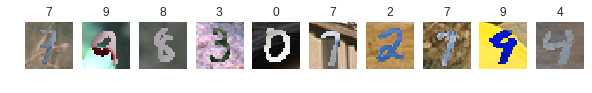

In [6]:
# visualize the dataset
start = 1500 #pick any number
for i in range(10):
  plt.subplot(2, 10, i + 11)
  plt.title(np.argmax(mnist.test.labels[start + i]))
  plt.imshow(np.reshape(mnistm_test[start + i:start + i + 1], (28, 28, 3)))
  plt.axis('off')
  
plt.gcf().set_size_inches(10, 4)
plt.show()

In [0]:
x = tf.placeholder(tf.float32, [None, 28, 28, 3])
y = tf.placeholder(tf.int64, [None, 10])
init = tf.contrib.layers.xavier_initializer()

x_in = tf.reshape(x, (-1, 28, 28, 3))
# Write your model here!
x_in = tf.layers.conv2d(inputs = x_in, filters=32, kernel_size=[3, 3], padding="valid", activation=tf.nn.leaky_relu) #26
x_in = tf.layers.conv2d(inputs = x_in, filters=32, kernel_size=[3, 3], padding="valid", activation=tf.nn.leaky_relu) #24
x_in = tf.layers.max_pooling2d(inputs = x_in, pool_size = [2, 2], strides = 2) #12
x_in = tf.layers.conv2d(inputs = x_in, filters=64, kernel_size=[3, 3], padding="valid", activation=tf.nn.leaky_relu) #10
x_in = tf.layers.conv2d(inputs = x_in, filters=64, kernel_size=[3, 3], padding="valid", activation=tf.nn.leaky_relu) #8
x_in = tf.layers.flatten(x_in) #8 * 8 * 64
x_in = tf.layers.dense(x_in, 16 * 64, activation=tf.nn.leaky_relu, kernel_initializer=init)
x_in = tf.layers.dense(x_in, 100, activation=tf.nn.leaky_relu, kernel_initializer=init) #100
x_in = tf.layers.dense(x_in, 50, activation=tf.nn.leaky_relu, kernel_initializer=init)
x_in = tf.layers.dense(x_in, 10, activation=tf.nn.leaky_relu, kernel_initializer=init) 
y_hat = x_in

In [0]:
# Now write your loss function! 
# Standard cross entropy with logits is fine (see tf.nn.softmax_cross_entropy_with_logits_v2)

# predict_loss = something something
predict_loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y)
loss = tf.reduce_sum(predict_loss)

In [0]:
# write an optimizer!
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(loss)

In [0]:
sess = tf.Session() #line 1
init = tf.global_variables_initializer() #line 2
sess.run(init) #line 3

In [0]:
# please explain what each of the lines above do
# line 1 = makes a tf session so you can run your compute graph
# line 2 = creates an initializer to init all the variables (so matricies get their respective values in the neural net)
# line 3 = runs the initializer

In [12]:
# Now write your training loop

batch_size = 256
loss_plot = []
num_epochs = 5000

mnistm_batch = batch_generator([mnistm_train, mnist.train.labels], batch_size)
for epoch in range(num_epochs + 1):
  batch_xs, batch_ys = next(mnistm_batch)
  _, loss_curr = sess.run([optimizer, loss], feed_dict={x: batch_xs, y: batch_ys})
  loss_plot.append(loss_curr)
  
  if epoch % 100 == 0:
        print(epoch, "Batch Loss:", loss_curr)

0 Batch Loss: 590.1183
100 Batch Loss: 99.973976
200 Batch Loss: 78.67651
300 Batch Loss: 53.039238
400 Batch Loss: 30.49443
500 Batch Loss: 28.864357
600 Batch Loss: 18.906887
700 Batch Loss: 18.134285
800 Batch Loss: 20.233217
900 Batch Loss: 15.623567
1000 Batch Loss: 13.708407
1100 Batch Loss: 15.145573
1200 Batch Loss: 21.056559
1300 Batch Loss: 10.287113
1400 Batch Loss: 3.6864438
1500 Batch Loss: 1.1305319
1600 Batch Loss: 7.494214
1700 Batch Loss: 7.401837
1800 Batch Loss: 3.9557452
1900 Batch Loss: 7.432272
2000 Batch Loss: 9.306996
2100 Batch Loss: 6.138073
2200 Batch Loss: 6.168682
2300 Batch Loss: 4.539533
2400 Batch Loss: 4.971257
2500 Batch Loss: 10.415581
2600 Batch Loss: 8.790635
2700 Batch Loss: 4.7819085
2800 Batch Loss: 0.74453014


KeyboardInterrupt: ignored

In [14]:
# Print Classification prediction
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Prediction accuracy (test)", sess.run(accuracy, feed_dict={x: mnistm_test, y: mnist.test.labels}))

Prediction accuracy (test) 0.9721


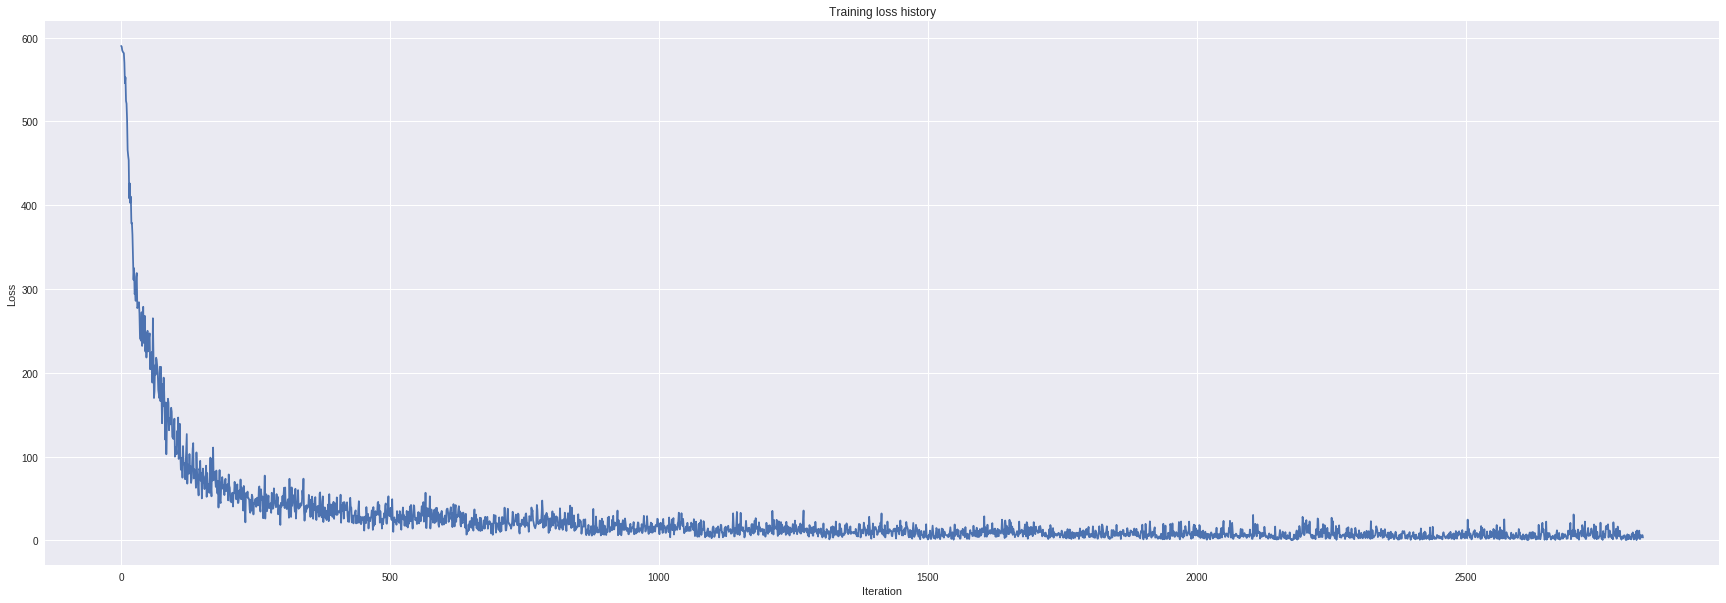

In [15]:
# visualize loss plot
plt.plot(loss_plot)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.gcf().set_size_inches(30, 10)
plt.show()